In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# 1. Loading data via pandas
# 2. Printing datasets size and first rows from the dataset

In [5]:
data = pd.read_csv('../input/household_power_consumption.txt', sep=';' ,
                   parse_dates = {'datetime':['Date', 'Time']}, index_col = ['datetime'], low_memory=False, na_values=['nan', '?'],infer_datetime_format=True)
print(data.shape)
data.head()

(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# 4. Printing number of rows with missing values, Sub_metering_3 column has the biggest number of missing values

In [6]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
data.loc[data.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Analysis values distribution for each column

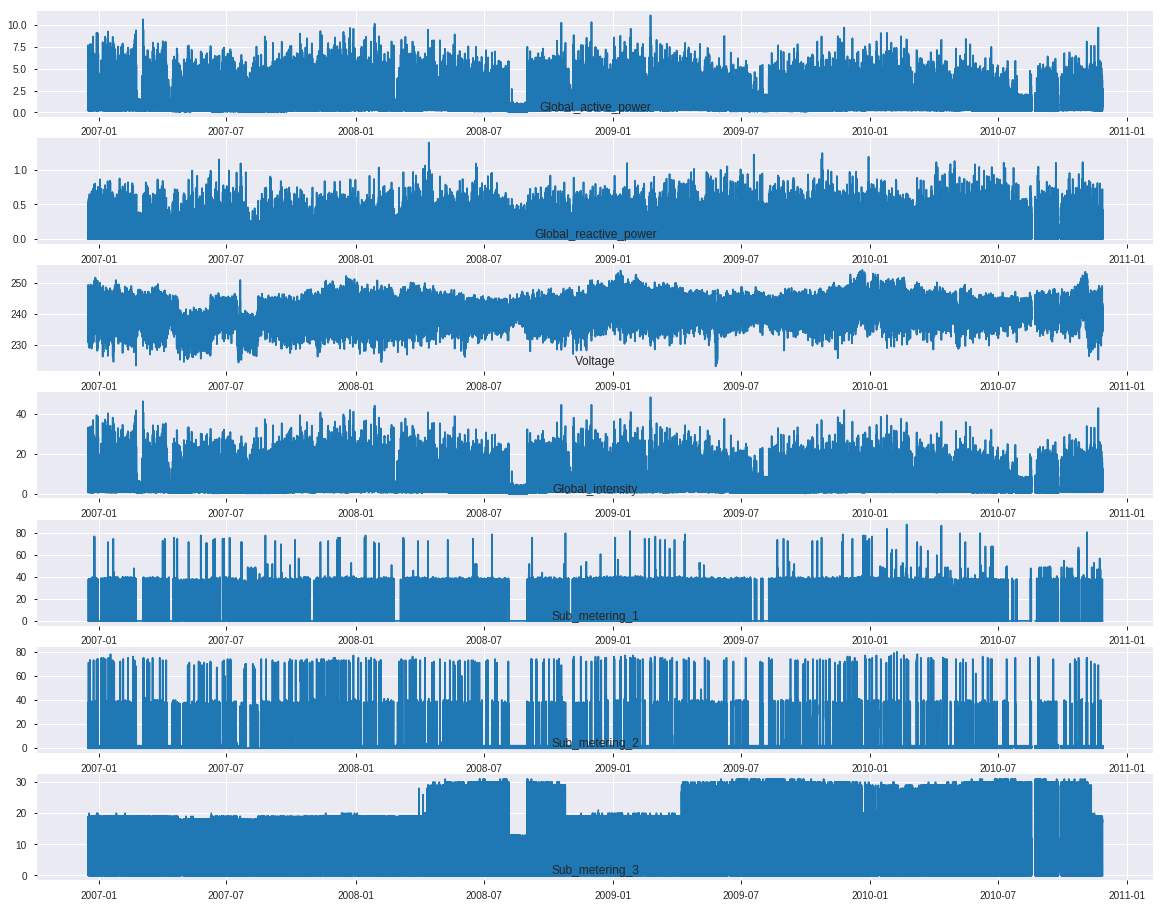

In [9]:
plt.figure(figsize= (20, 16))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name= data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0)
plt.show()

# 6. Change in daily average Global_active_power

In [10]:
data = data.dropna()
data = data.astype('float32')
daily_group = data.resample('D')

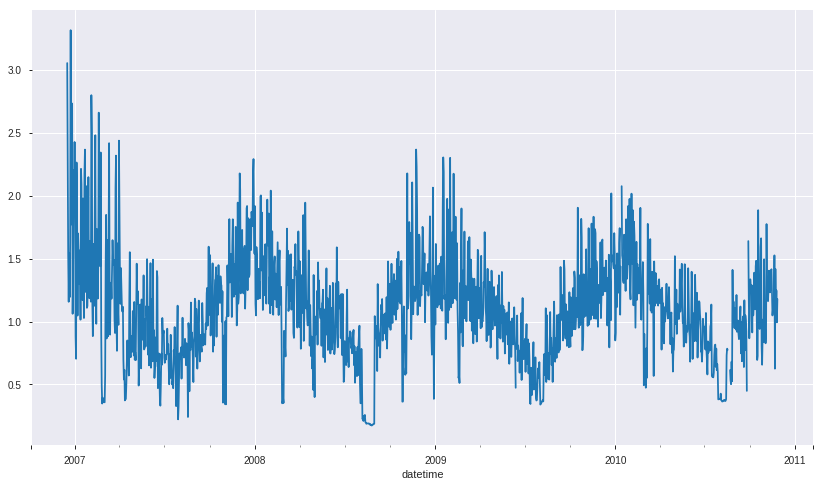

In [11]:
daily_group.Global_active_power.mean().plot(figsize=(14,8));

# 7. Ploting columns with respect to date(2008-02-01 amd 2008-02-02)

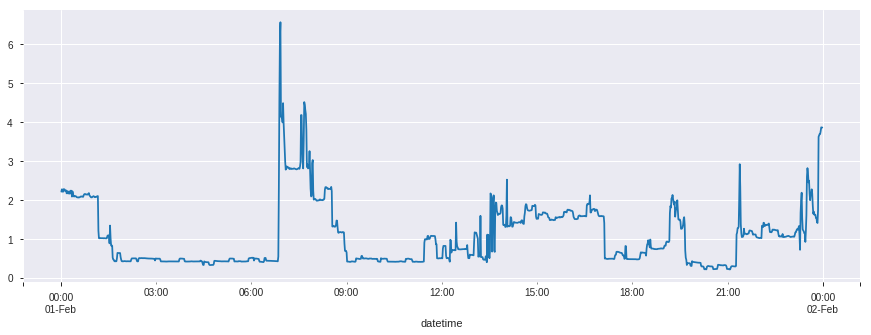

In [12]:
mask = (data.index > '2008-02-01') & (data.index < '2008-02-02')
data.Global_active_power.loc[mask].plot(figsize=(15,5));

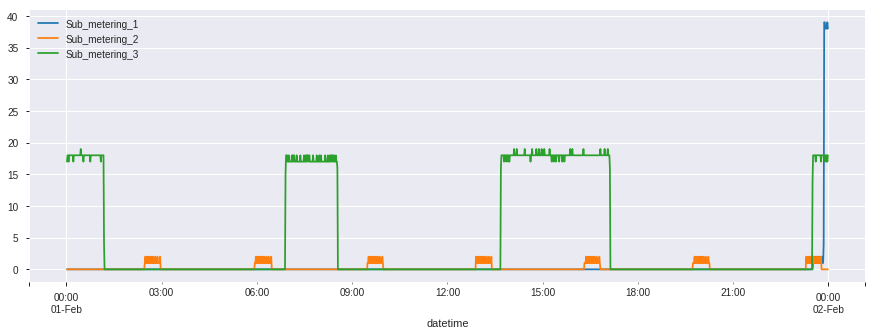

In [13]:
data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].loc[mask].plot(figsize=(15,5));

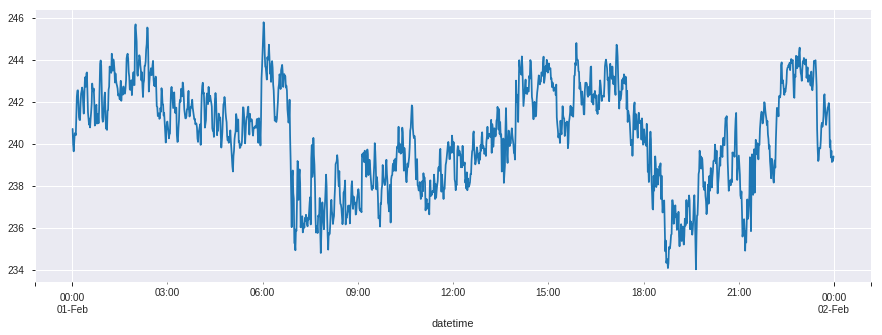

In [14]:
data.Voltage.loc[mask].plot(figsize=(15,5));

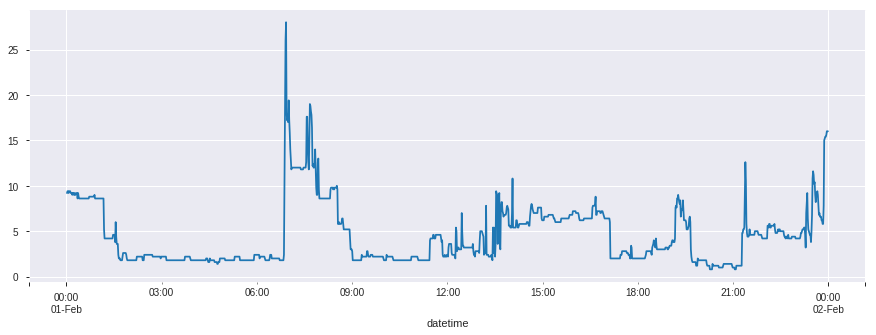

In [15]:
data.Global_intensity.loc[mask].plot(figsize=(15,5));

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


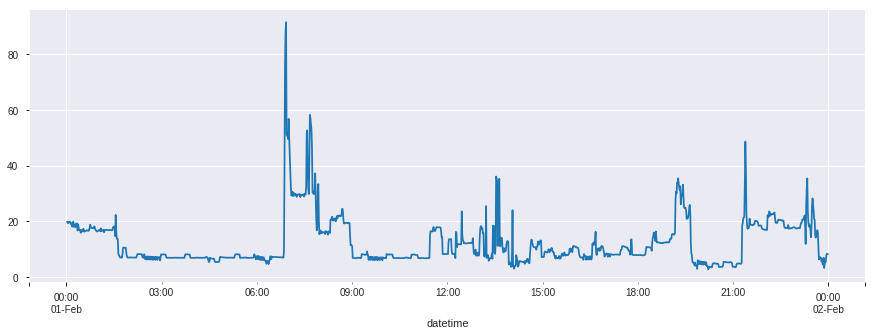

In [16]:
data.Active_energy_consumed = data.Global_active_power*1000/60 - data.Sub_metering_1 - data.Sub_metering_2 - data.Sub_metering_3
data.Active_energy_consumed.loc[mask].plot(figsize=(15,5));

# 8. Dates with abnormal voltage

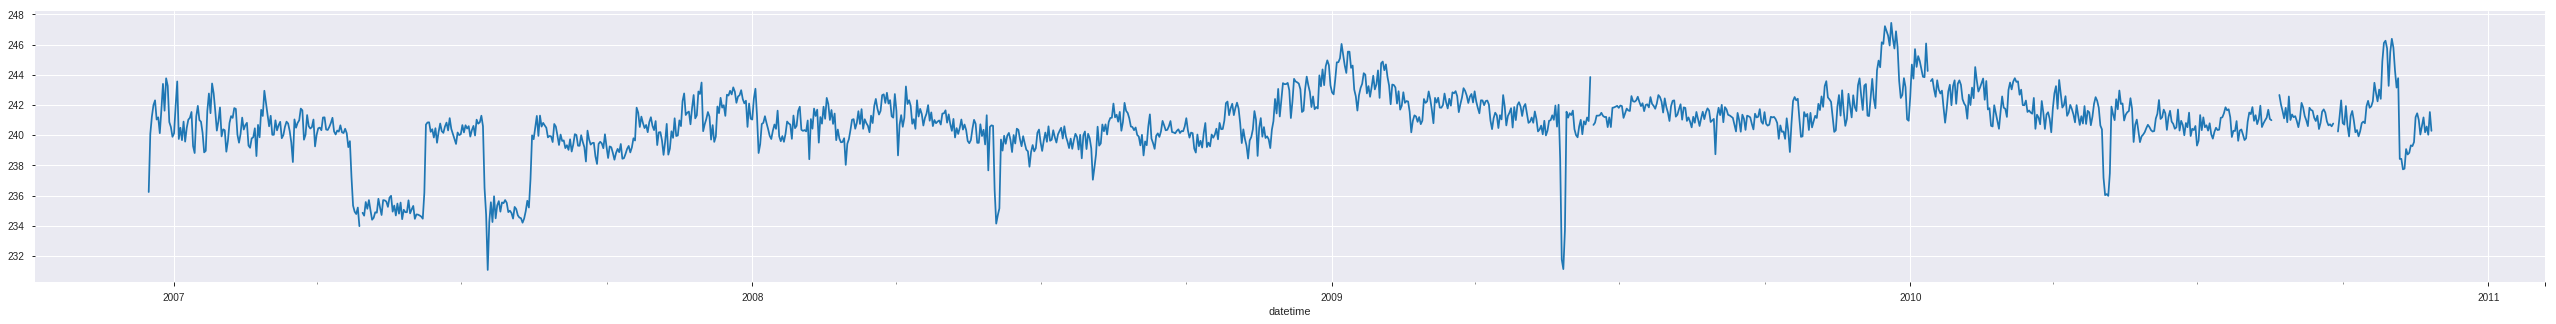

In [22]:
daily_group.Voltage.mean().plot(figsize=(45,5));

We can see that abnormal voltage took place in the middle of each year.

# 9. Correlation between columns

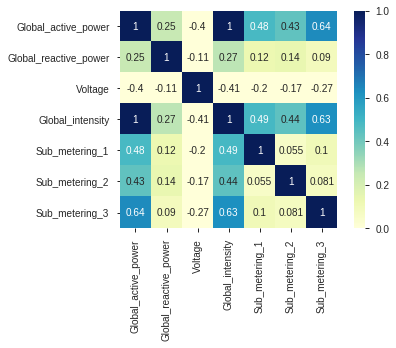

In [27]:
pearson = data.corr(method='pearson')
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu");

# 10. Preprocessing of the dataset

In [24]:
train, test = train_test_split(data, test_size = 0.2)
data.shape, train.shape, test.shape

((2049280, 7), (1639424, 7), (409856, 7))

# 11. Generating automatic report for the dataset via pandas_profiling library

In [25]:
pp.ProfileReport(data)

Summing up I would take all columns as they are quite correlated with the target column - Global_active_power, except Global_intensity as it is highly correlated. During modeling part i would use step-forward validation as it is quite useful for big time series data.